In [1]:
# venv
import torch
import datetime as dt
print(torch.__version__)

if torch.cuda.is_available():
    print("GPU is available.")
else:
    print("No GPU found. Using CPU.")

2.0.1+cu117
GPU is available.


In [1]:
from dotenv import load_dotenv
import os
from pyannote.core import Segment, Annotation
from pyannote.core import notebook
import matplotlib.pyplot as plt
load_dotenv()
import pickle, json
import torch
pretrained_pipeline.to(torch.device("cuda"))
from pyannote.audio import Pipeline

In [34]:
pretrained_pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization-3.0",
                                               use_auth_token=os.getenv('HUGGINGFACE_TOKEN'))

pretrained_pipeline.instantiate({
    "segmentation": {
        "min_duration_off": 0.0,
    },
    "clustering": {
        "method": "centroid",
        "min_cluster_size": 12,
        "threshold": 0.6,
    },
})

pretrained_pipeline.parameters(instantiated=True)

{'segmentation': {'min_duration_off': 0.0},
 'clustering': {'method': 'centroid',
  'min_cluster_size': 12,
  'threshold': 0.6}}

In [4]:
def create_annotation_plot(speaker_timelines, filename):
    custom_diarization = Annotation()
    
    for speaker_key in speaker_timelines.keys():
        for timeline in speaker_timelines[speaker_key]:
            custom_diarization[Segment(timeline[0], timeline[1])] = speaker_key

    # Create a figure
    fig, ax = plt.subplots(figsize=(10, 2))

    # Plot the custom diarization result
    notebook.plot_annotation(custom_diarization, ax, legend=True)

    # Customize the plot (if needed)
    ax.set_xlabel('Time')
    ax.set_yticks([])  # To hide the y-axis

    # Save the figure
    fig.savefig(f'{filename}.png', bbox_inches='tight')

In [5]:
audio_path = "Audios"
files = [
    f
    for f in os.listdir(audio_path)
    if os.path.isfile(os.path.join(audio_path, f))
    and os.path.splitext(os.path.join(audio_path, f))[1] in [".mp3"]
]
files

['StarTalk_FlyingVehicles_2670_2710.mp3',
 'StarTalk_Sleep_2379_2443.mp3',
 'StarTalk_Sleep_748_796.mp3',
 'StarTalk_FlyingVehicles_674_719.mp3',
 'StarTalk_FlyingVehicles_1980_2040.mp3',
 'StarTalk_FlyingVehicles_1001_1043.mp3',
 'StarTalk_Sleep_1152_1211.mp3',
 'StarTalk_FlyingVehicles_300_340.mp3',
 'NDT_India_19_88.mp3',
 'StarTalk_FlyingVehicles_2446_2508.mp3',
 'MagnusCarlson_542_599.mp3',
 'StarTalk_CMBR_92_152.mp3',
 'StarTalk_FlyingVehicles_949_1000.mp3',
 'StarTalk_Sleep_2470_2551.mp3',
 'StarTalk_Sleep_2099_2160.mp3',
 'StarTalk_Sleep_1980_2041.mp3',
 'StarTalk_Sleep_1602_1639.mp3',
 'StarTalk_Sleep_382_450.mp3',
 'StarTalk_FlyingVehicles_780_811.mp3',
 'StarTalk_CMBR_190_225.mp3',
 'StarTalk_CMBR_270_308.mp3',
 'StarTalk_CMBR_319_356.mp3']

In [6]:
final_output = {}
for f in files:
    print(f)
    diarization = pretrained_pipeline(os.path.join(audio_path, f))
    audio_output = {}
    for duration,_, speaker_key in diarization.itertracks(yield_label=True):
        if speaker_key in audio_output.keys():
            audio_output[speaker_key].append((duration.start,duration.end))
        else:
            audio_output[speaker_key] = [(duration.start,duration.end)]
    final_output[f] = audio_output

StarTalk_FlyingVehicles_2670_2710.mp3
StarTalk_Sleep_2379_2443.mp3
StarTalk_Sleep_748_796.mp3
StarTalk_FlyingVehicles_674_719.mp3
StarTalk_FlyingVehicles_1980_2040.mp3
StarTalk_FlyingVehicles_1001_1043.mp3
StarTalk_Sleep_1152_1211.mp3
StarTalk_FlyingVehicles_300_340.mp3
NDT_India_19_88.mp3
StarTalk_FlyingVehicles_2446_2508.mp3
MagnusCarlson_542_599.mp3
StarTalk_CMBR_92_152.mp3
StarTalk_FlyingVehicles_949_1000.mp3
StarTalk_Sleep_2470_2551.mp3
StarTalk_Sleep_2099_2160.mp3
StarTalk_Sleep_1980_2041.mp3
StarTalk_Sleep_1602_1639.mp3
StarTalk_Sleep_382_450.mp3
StarTalk_FlyingVehicles_780_811.mp3
StarTalk_CMBR_190_225.mp3
StarTalk_CMBR_270_308.mp3
StarTalk_CMBR_319_356.mp3


In [11]:
with open("Audios/diarize.pkl", "wb") as file:
    pickle.dump(final_output, file)

In [5]:
f = 'PM_Progun.mp3'
diarization = pretrained_pipeline(f)
audio_output = {}
for duration,_, speaker_key in diarization.itertracks(yield_label=True):
    if speaker_key in audio_output.keys():
        audio_output[speaker_key].append((duration.start,duration.end))
    else:
        audio_output[speaker_key] = [(duration.start,duration.end)]
create_annotation_plot(audio_output, os.path.splitext(f)[0])

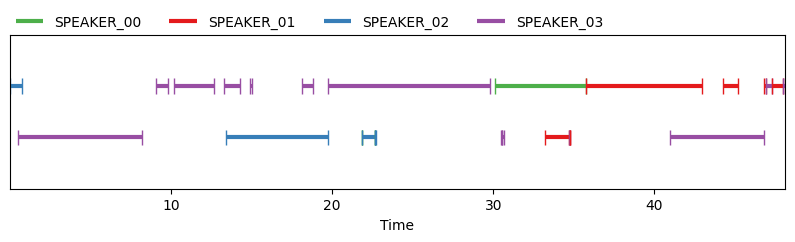

In [35]:
f = '../../output/StarTalk_Sleep_748_796/pyavi/audio.wav'
diarization = pretrained_pipeline(f)
audio_output = {}
for duration,_, speaker_key in diarization.itertracks(yield_label=True):
    if speaker_key in audio_output.keys():
        audio_output[speaker_key].append((duration.start,duration.end))
    else:
        audio_output[speaker_key] = [(duration.start,duration.end)]
create_annotation_plot(audio_output, os.path.splitext(f)[0])